In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2'”
Old packages: 'BiocManager', 'nlme'



In [2]:
library(DESeq2)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [82]:
sigs <- read.delim("./deseq_results_gene_mapped.csv", header = TRUE, row.names = 1, sep = ",")
colnames(sigs)[colnames(sigs) == "Gene.Name"] <- "symbol"
dim(sigs)
head(sigs)

[1] 13170     7

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000041988,103.48697,-0.27569729,0.1626551,-1.6949813,0.09007896,0.3374672,THAP3
ENSG00000142611,23.80864,-1.88467131,0.8786279,-2.1450165,0.03195153,0.1817173,PRDM16
ENSG00000225630,924.42063,0.73947581,0.3723052,1.9862086,0.04701016,0.2319105,MTND2P28
ENSG00000067606,24.06831,0.33801866,0.4125829,0.8192745,0.41262983,0.7200708,PRKCZ
ENSG00000131584,737.09439,-0.04670618,0.2140536,-0.2181985,0.82727442,0.9415720,ACAP3
ENSG00000169972,135.50065,-0.14829262,0.1830534,-0.8101059,0.41787930,0.7246479,PUSL1


In [83]:
# # Clean up the df
# sigs <- sigs[which(rowSums(sigs) > 0),]
# dim(sigs)

In [103]:
# Select top DEGs
df.top <- sigs[ (sigs$baseMean > 50 ) & ( abs(sigs$log2FoldChange) > 1)  , ]
df.top <- df.top[order(df.top$log2FoldChange, decreasing = T), ]
dim(df.top)
head(df.top)

[1] 344   7

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000115009,61.13428,3.335274,1.236200,2.698005,0.006975637,0.06418991,CCL20
ENSG00000163898,110.65579,3.176542,1.190381,2.668509,0.007618871,0.06851361,LIPH
ENSG00000102109,53.26640,3.006918,1.173675,2.561969,0.010408071,0.08588185,PCSK1N
ENSG00000183486,89.88926,2.913795,1.456728,2.000232,0.045475220,0.22731647,MX2
ENSG00000166396,71.13868,2.849720,1.189656,2.395415,0.016601559,0.11895891,SERPINB7
ENSG00000142583,59.60138,2.773167,1.067217,2.598503,0.009363110,0.07996928,SLC2A5


In [104]:
# # Save to an RDS file
# saveRDS(dds, "dds.rds")

# Load from an RDS file
dds <- readRDS("dds.rds")

In [105]:
# Get normalized count data from dds object
rlog_out <- rlog(dds, blind=FALSE)
# Check the rlog obj, this transformation shrinks and stablizes the data value
rlog_out
# Access using assay function
head(assay(rlog_out))

class: DESeqTransform 
dim: 14847 8 
metadata(1): version
assays(1): ''
rownames(14847): ENSG00000160072 ENSG00000041988 ... ENSG00000273748
  ENSG00000271254
rowData names(23): baseMean baseVar ... maxCooks rlogIntercept
colnames(8): Ctr_s1 Ctr_s2 ... RS_s12 RS_s16
colData names(2): condition sizeFactor

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
ENSG00000160072,8.428393,8.328033,8.434946,8.648271,8.247842,8.168956,8.111846,8.044884
ENSG00000041988,6.787615,6.793196,6.722893,6.730773,6.602623,6.575434,6.581044,6.704306
ENSG00000198744,3.556560,6.939570,3.806517,3.674119,7.193145,3.622555,3.773947,3.759957
ENSG00000142611,4.964913,4.289170,4.707731,4.154099,3.990298,4.274259,4.281854,3.908861
ENSG00000225630,9.331006,9.563774,9.493981,9.687515,10.368661,9.328216,9.625369,10.471766
ENSG00000067606,4.553557,4.574214,4.575580,4.403646,4.667421,4.414288,4.586210,4.739417


In [106]:
Counts <- read.delim("count_table_for_deseq_example.csv", header = TRUE, row.names = 1, sep = ",")
condition <- factor(c("C","C","C","C", "S","S","S","S"))
coldata <- data.frame(row.names = colnames(Counts), condition)

# select the rlog_out data of DEGs using the sig DEGs that we generated and coldata
mat<-assay(rlog_out)[rownames(df.top), rownames(coldata)] #sig genes x samples
dim(mat)
head(mat)

[1] 344   8

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
ENSG00000115009,4.026155,4.875371,3.904902,4.194721,5.663147,4.313416,4.284741,6.825008
ENSG00000163898,4.540835,4.518195,4.275345,5.741652,5.360059,4.615390,5.877835,8.001469
ENSG00000102109,4.233184,4.023569,4.846993,4.205920,4.020275,4.725037,6.562434,5.503206
ENSG00000183486,5.478404,3.917596,4.733914,4.320713,7.548768,6.023311,4.464370,4.196348
ENSG00000166396,5.132792,4.356453,5.375457,4.369437,6.223431,6.190679,6.789507,4.686276
ENSG00000142583,5.047524,4.526161,4.763538,4.189887,4.885197,6.691984,5.973362,4.573822


In [107]:
coldata

,condition
,<fct>
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,S
RS_s9,S
RS_s12,S
RS_s16,S


In [108]:
#center and scale each column (Z-score) then transpose
base_mean <- rowMeans(mat)
# the 1 means we are applying scale function to the rows ( axis 1 for R)
mat.scaled <- t(apply(mat, 1, scale)) 
# Add back the colname after the normalization
colnames(mat.scaled)<-colnames(mat)
dim(mat.scaled)
head(mat.scaled)

[1] 344   8

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
ENSG00000115009,-0.72918369,0.1135673,-0.84951445,-0.5619010,0.895346241,-0.44411017,-0.4725665,2.0483623
ENSG00000163898,-0.67398244,-0.6924665,-0.89073857,0.3064141,-0.005134162,-0.61311222,0.4175990,2.1514207
ENSG00000102109,-0.60094404,-0.8377709,0.09255016,-0.6317469,-0.841492562,-0.04523861,2.0306903,0.8339526
ENSG00000183486,0.32317277,-0.9603942,-0.28907561,-0.6288817,2.025786091,0.77129072,-0.5107417,-0.7311564
ENSG00000166396,-0.27916013,-1.1201111,-0.01629954,-1.1060468,0.902248432,0.86677118,1.5154366,-0.7628387
ENSG00000142583,-0.04056798,-0.6642902,-0.38030962,-1.0665852,-0.234764649,1.92674966,1.0670403,-0.6072723


In [109]:
# keep the top and bottom 25 DEGs
num_keep <- 25
#1 to num_keep len-num_keep to len
rows_keep <- c(seq(1:num_keep), seq((nrow(mat.scaled)-num_keep), nrow(mat.scaled)) )

In [110]:
l2_val <- as.matrix(df.top[rows_keep,]$log2FoldChange) #getting log2 value for each gene we are keeping
colnames(l2_val)<-"logFC"

mean <- as.matrix(df.top[rows_keep,]$baseMean) #getting mean value for each gene we are keeping

In [111]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("ComplexHeatmap")

In [112]:
library(ComplexHeatmap)
library(RColorBrewer)
library(circlize)

In [113]:
#maps values between b/w/r for min and max l2 values
col_logFC <- colorRamp2(c(min(l2_val),0, max(l2_val)), c("blue", "white", "red")) 

#maps between 0% quantile, and 75% quantile of mean values --- 0, 25, 50, 75, 100
col_AveExpr <- colorRamp2(c(quantile(mean)[1], quantile(mean)[4]), c("white", "red"))

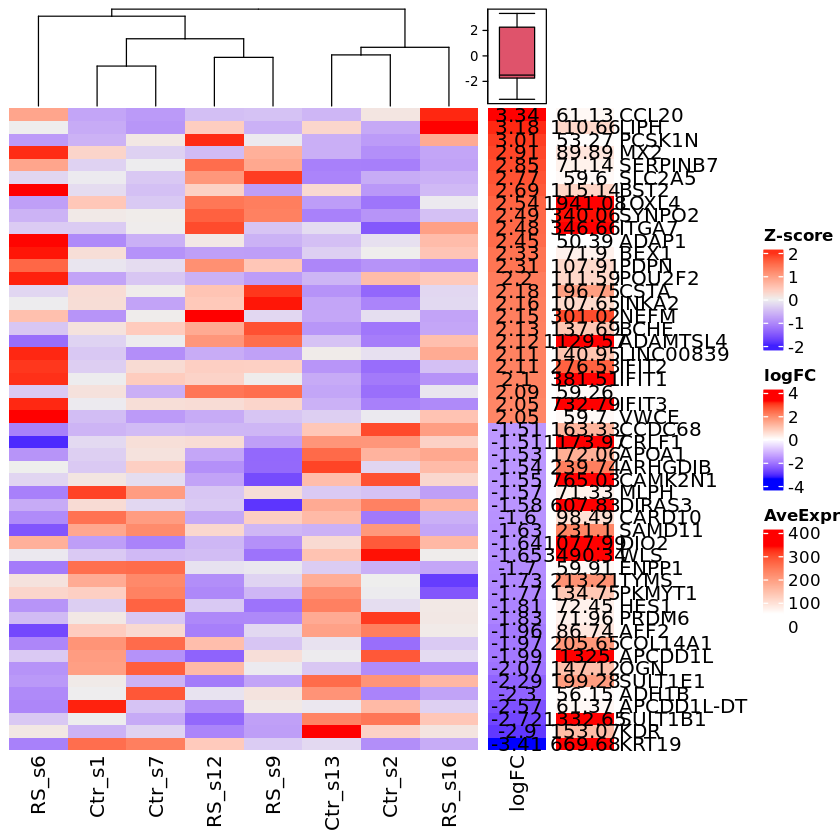

In [114]:
ha <- HeatmapAnnotation(summary = anno_summary(gp = gpar(fill = 2), 
                                               height = unit(2, "cm")))

h1 <- Heatmap(mat.scaled[rows_keep,], cluster_rows = F, 
            column_labels = colnames(mat.scaled), name="Z-score",
            cluster_columns = T)
h2 <- Heatmap(l2_val, row_labels = df.top$symbol[rows_keep], 
            cluster_rows = F, name="logFC", top_annotation = ha, col = col_logFC,
            cell_fun = function(j, i, x, y, w, h, col) { # add text to each grid
              grid.text(round(l2_val[i, j],2), x, y)
            })
h3 <- Heatmap(mean, row_labels = df.top$symbol[rows_keep], 
            cluster_rows = F, name = "AveExpr", col=col_AveExpr,
            cell_fun = function(j, i, x, y, w, h, col) { # add text to each grid
              grid.text(round(mean[i, j],2), x, y)
            })

h<-h1+h2+h3
h

In [115]:
png("./heatmap_v1.png", res = 300, width = 3000, height = 5500)
print(h)
dev.off()s

ERROR: Error in parse(text = x, srcfile = src): <text>:3:10: unexpected symbol
2: print(h)
3: dev.off()s
            ^
